<a href="https://colab.research.google.com/github/nerumur/Valeria/blob/main/hw_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
!pip install -q datasets
#pip install - команда shell для загрузки библиотек
#-q - параметр "quiet", не выводит не экран подробную информацию о процессе загрузки библиотеки
#! - символ для объявления shell-команд

from datasets import load_dataset   #загружаем датасет

dataset = load_dataset("Sp1786/multiclass-sentiment-analysis-dataset")

dataset


DatasetDict({
    train: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 31232
    })
    validation: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 5205
    })
    test: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 5206
    })
})

In [136]:
#Task 1
#Проверим, сбалансирован ли наш датасет.

# Какие метки есть в датасете?

unique_labels = set()                                  # Создаем множество set()
                                                       # Множество - это список уникальных элементов (они не повторяются)
                                                       # Этот тип данных можно использовать как фильтр для наших меток -
                                                       # Получается, что оно само ищет метки в sentiment, тк убирает повторяющиеся элементы и оставляет уникальные

for i in dataset['train']:                             # Для каждого элемента из обучающей выборки dataset['train']
  unique_labels.add(i['sentiment'])                    # Добавим элемент в множество unique_labels (set использует add, а не append (прикрепляет к концу))

unique_labels

{'negative', 'neutral', 'positive'}

In [137]:
negative_train = 0
positive_train = 0
neutral_train = 0

negative_validation = 0                                      # создайте пустые переменные, куда вы будете вносить количество меток
positive_validation = 0
neutral_validation = 0

negative_test = 0
positive_test = 0
neutral_test = 0

for i in dataset['train']:                                   #проходимся по обучающей выборке
  if i['sentiment'] == 'negative':                           #проверка по метке
    negative_train += 1                                      # обновляйте значения переменных методом счетчика (каждое новое совпадение: counter += 1)
  elif i['sentiment'] == 'neutral':
    neutral_train += 1
  elif i['sentiment'] == 'positive':
    positive_train += 1

for i in dataset['validation']:                              #проходимся по проверочной выборке
  if i['sentiment'] == 'negative':
    negative_validation += 1
  elif i['sentiment'] == 'neutral':
    neutral_validation += 1
  elif i['sentiment'] == 'positive':
    positive_validation += 1

for i in dataset['test']:                                    #проходимся по тестовой выборке
  if i['sentiment'] == 'negative':
    negative_test += 1
  elif i['sentiment'] == 'neutral':
    neutral_test += 1
  elif i['sentiment'] == 'positive':
    positive_test += 1

print('Данные обучающей выборки')
print('Отрицательные метки: ', negative_train, '\nНейтральные метки: ', neutral_train, '\nПоложительные метки: ', positive_train)

print('---------------------------')

print('Данные проверочной выборки')
print('Отрицательные метки: ', negative_validation, '\nНейтральные метки: ', neutral_validation, '\nПоложительные метки: ', positive_validation)

print('---------------------------')

print('Данные тестовой выборки')
print('Отрицательные метки: ', negative_test, '\nНейтральные метки: ', neutral_test, '\nПоложительные метки: ', positive_test)


Данные обучающей выборки
Отрицательные метки:  9105 
Нейтральные метки:  11649 
Положительные метки:  10478
---------------------------
Данные проверочной выборки
Отрицательные метки:  1517 
Нейтральные метки:  1928 
Положительные метки:  1760
---------------------------
Данные тестовой выборки
Отрицательные метки:  1546 
Нейтральные метки:  1930 
Положительные метки:  1730


In [138]:
# Используйте арифметические операции, чтобы посчитать процентное соотношение или долю каждого класса в каждой выборке

total_train = len(dataset['train'])                                         #вычисляем общее количество меток в каждой из выборок
total_val = len(dataset['validation'])
total_test = len(dataset['test'])

train_negative_perc = round(negative_train * 100 / total_train)             #высчитываем проценты в обучающей выборке, округляем их
train_neutral_perc = round(neutral_train * 100 / total_train)
train_positive_perc = round(positive_train * 100 / total_train)

val_negative_perc = round(negative_validation * 100 / total_val)            #высчитываем проценты в проверочной выборке, округляем их
val_neutral_perc = round(neutral_validation * 100 / total_val)
val_positive_perc = round(positive_validation * 100 / total_val)

test_negative_perc = round(negative_test * 100 / total_test)                #высчитываем проценты в тестовой выборке, округляем их
test_neutral_perc = round(neutral_test * 100 / total_test)
test_positive_perc = round(positive_test * 100 / total_test)


print('Данные обучающей выборки')
print(f'Отрицательные метки составляют {train_negative_perc}% обучающей выборки')
print(f'Нейтральные метки составляют {train_neutral_perc}% обучающей выборки')
print(f'Положительные метки составляют {train_positive_perc}% обучающей выборки')

print('---------------------------')

print('Данные проверочной выборки')
print(f'Отрицательные метки составляют {val_negative_perc}% проверочной выборки')       #получаются те же цифры, что и в обучающей выборке
print(f'Нейтральные метки составляют {val_neutral_perc}% проверочной выборки')          #но мы можем убрать округление и увидеть, что цифры все-таки разные
print(f'Положительные метки составляют {val_positive_perc}% проверочной выборки')       #и код работает верно (?)

print('---------------------------')

print('Данные тестовой выборки')
print(f'Отрицательные метки составляют {test_negative_perc}% тестовой выборки')
print(f'Нейтральные метки составляют {test_neutral_perc}% тестовой выборки')
print(f'Положительные метки составляют {test_positive_perc}% тестовой выборки')

Данные обучающей выборки
Отрицательные метки составляют 29% обучающей выборки
Нейтральные метки составляют 37% обучающей выборки
Положительные метки составляют 34% обучающей выборки
---------------------------
Данные проверочной выборки
Отрицательные метки составляют 29% проверочной выборки
Нейтральные метки составляют 37% проверочной выборки
Положительные метки составляют 34% проверочной выборки
---------------------------
Данные тестовой выборки
Отрицательные метки составляют 30% тестовой выборки
Нейтральные метки составляют 37% тестовой выборки
Положительные метки составляют 33% тестовой выборки


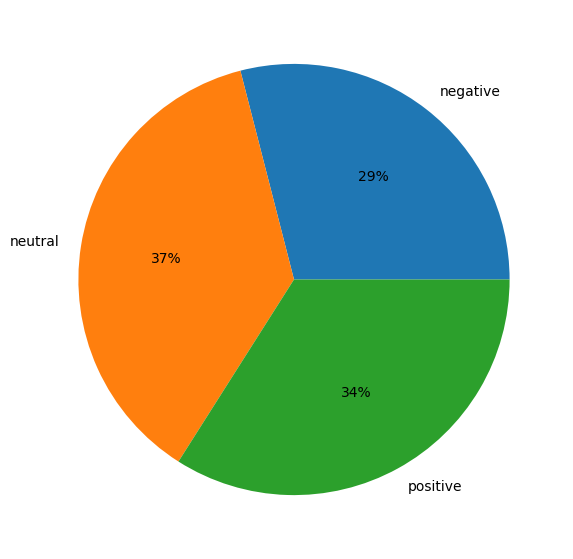

In [139]:
# Создадим визуализацию

from matplotlib import pyplot as plt                      # Будем работать с библиотекой matplotlip
import numpy as np                                        # Numpy - библиотека для обработки массивов данных - обеспечивает работу matplotlib

labels = ['negative', 'neutral', 'positive']              # Задаем список меток

# Задаем значения для каждой метки, процентное соотношение (только для обучающей выборки)
data = train_negative_perc, train_neutral_perc, train_positive_perc

# Код для отрисовки круговой диаграммы
fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels, autopct='%1.f%%')            # autopict создает числовые подписи и использует целочисленное форматирование

# Показать график
plt.show()

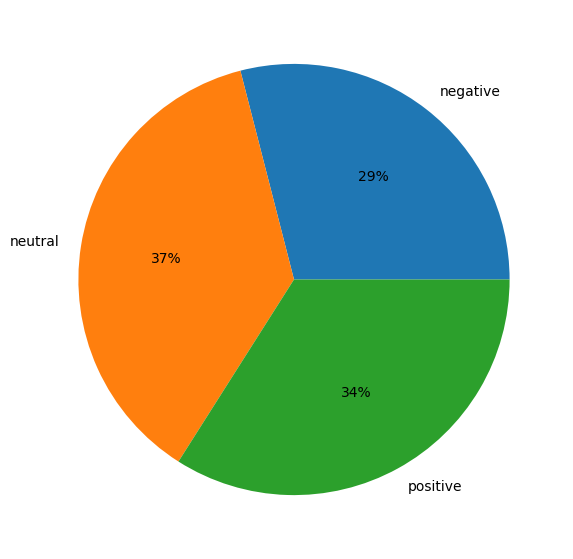

In [140]:
# Задаем значения для каждой метки, процентное соотношение (только для проверочной выборки)
data = val_negative_perc, val_neutral_perc, val_positive_perc

# Код для отрисовки круговой диаграммы
fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels, autopct='%1.f%%')            # autopict создает числовые подписи и использует целочисленное форматирование

# Показать график
plt.show()

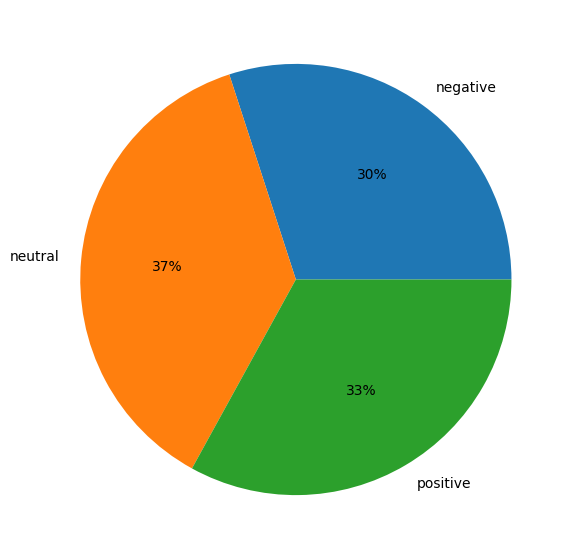

In [141]:
# Задаем значения для каждой метки, процентное соотношение (только для тестовой выборки)
data = test_negative_perc, test_neutral_perc, test_positive_perc

# Код для отрисовки круговой диаграммы
fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels, autopct='%1.f%%')            # autopict создает числовые подписи и использует целочисленное форматирование

# Показать график
plt.show()

In [142]:
#Task 2
#Обработка естественного языка (библиотека SpaCy)

import spacy                           # Загрузка spaCy
from spacy import displacy             # Загрузка библиотеки для визуализации spaCy

# Инициализация инструментов SpaCy для английского (для каждого языка загружается свой вариант)
nlp = spacy.load('en_core_web_sm')

# Выведем доступные инструменты
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [143]:
# Токенизация SpaCy производится с помощью цикла for

# Образец текста из нашего датасета
sample = dataset['train'][0]['text']
sample

# Для работы со SpaCy, _нужно_ привести все к нужному виду
# Для этого загружаем в nlp наш текст
doc = nlp(sample)
doc                                # Визуально ничего не изменилось, но теперь это объект класса SpaCy, который можно обработать инструментами NLP

Cooking microwave pizzas, yummy

In [144]:
# Токенизация
for token in doc:
    print(token.text)

Cooking
microwave
pizzas
,
yummy


In [145]:
# Частересная разметка
for token in doc:
    print(token.pos_)

NOUN
NOUN
NOUN
PUNCT
ADJ


In [146]:
# Лемматизация
for token in doc:
    print(token.lemma_)

cooking
microwave
pizza
,
yummy


In [147]:
# Синтаксическая роль (составляющие)
for token in doc:
    print(token.tag_)

NN
NN
NNS
,
JJ


In [148]:
# Синтаксическая роль (зависимости)
for token in doc:
    print(token.dep_)

compound
compound
ROOT
punct
amod


In [149]:
# Морфологическая разметка
for token in doc:
    print(token.morph)

Number=Sing
Number=Sing
Number=Plur
PunctType=Comm
Degree=Pos


In [150]:
# Задание!

# Сохраним в отдельную переменную список текстов из тестовой выборки
texts = dataset['test']['text']
print(texts [ :5])                   # Выведите первые 5 текстов

['getting cds ready for tour', ' MC, happy mother`s day to your mom ;).. love yah', 'A year from now is graduation....i am pretty sure i`m not ready for it!?!?!?', ' because you had chips and sale w/o me', 'Great for organising my work life balance']


In [151]:
# Создадим список токенов для каждого текста с помощью SpaCy

doc2 = list(nlp.pipe(texts[:100]))                   # Не забудьте применить nlp! + ограничиваем первыми 100 текстами
for doc in doc2:                                     # итерация по каждому документу
  for token in doc:                                  # итерация по каждому токену(слову) в каждом документе
    print(token.text[:5])                            # токенизация + выводим первые 5 текстов

getti
cds
ready
for
tour
 
MC
,
happy
mothe
day
to
your
mom
;)
..
love
yah
A
year
from
now
is
gradu
....
i
am
prett
sure
i`m
not
ready
for
it
!
?
!
?
!
?
 
becau
you
had
chips
and
sale
w/o
me
Great
for
organ
my
work
life
balan
 
its
my
going
away
party
 
`
s.
 
you
shoul
come
!
Is
Watch
Brita
Got
Talen
,
&
Is
bitin
her
nails
.
Pleas
don`t
come
off
black
nail
varni
 
remem
the
guy
who
1st
#
tweet
you
!
~
>
_
2890
 
help
him
get
900
flwrs
&
make
him
smile
!
 
She
!
Maybe
that
was
our
first
mista
.
 
Not
every
is
as
cool
as
  
(
brown
nose
momen
)
today
i
was
so
happy
got
i
got
off
schoo
early
,
but
now
i`m
bored
!
!
 
but
but
it
was
funny
when
I
wrote
it
 
I
saw
an
all
red
Audi
on
the
highw
.
I
sped
uo
to
it
hopin
it
was
you
.
My
loss
I
loved
this
app
.
Worke
so
great
I
purch
it
.
Now
it
has
logge
me
out
and
says
I
do
n't
exist
.
	
REALL
?
?
oh
..
sorry
y
all
 
lol
 
i`m
total
gon
na
have
money
to
actua
buy
a
pair
of
shoes
this
time
Widge
is
mostl
usele
-
it
const
displ
no
items
while
ha

In [152]:
#3. Частеречная разметка: создаем список частей речи для каждого токена

for doc in doc2:
  for token in doc:
    print(token.pos_)

VERB
NOUN
ADJ
ADP
NOUN
SPACE
PROPN
PUNCT
ADJ
PROPN
NOUN
ADP
PRON
NOUN
PUNCT
PUNCT
NOUN
NOUN
DET
NOUN
ADP
ADV
AUX
NOUN
PUNCT
PRON
AUX
ADV
ADJ
PROPN
PART
ADJ
ADP
PRON
PUNCT
PUNCT
PUNCT
PUNCT
PUNCT
PUNCT
SPACE
SCONJ
PRON
VERB
NOUN
CCONJ
NOUN
ADP
PRON
ADJ
ADP
VERB
PRON
NOUN
NOUN
NOUN
SPACE
PRON
PRON
VERB
ADV
NOUN
SPACE
PUNCT
PROPN
SPACE
PRON
AUX
VERB
PUNCT
AUX
PROPN
PROPN
PROPN
NOUN
PUNCT
CCONJ
AUX
VERB
PRON
NOUN
PUNCT
INTJ
PROPN
VERB
ADP
ADJ
NOUN
NOUN
SPACE
VERB
DET
NOUN
PRON
VERB
X
VERB
PRON
PUNCT
PUNCT
X
PUNCT
NUM
SPACE
VERB
PRON
VERB
NUM
NOUN
CCONJ
VERB
PRON
VERB
PUNCT
SPACE
PRON
PUNCT
ADV
PRON
AUX
PRON
ADJ
NOUN
PUNCT
SPACE
PART
PRON
AUX
ADV
ADJ
ADP
SPACE
PUNCT
ADJ
NOUN
NOUN
PUNCT
NOUN
PRON
AUX
ADV
ADJ
VERB
PRON
VERB
ADP
NOUN
ADV
PUNCT
CCONJ
ADV
PROPN
PROPN
PUNCT
PUNCT
SPACE
CCONJ
CCONJ
PRON
AUX
ADJ
SCONJ
PRON
VERB
PRON
SPACE
PRON
VERB
DET
DET
ADJ
PROPN
ADP
DET
NOUN
PUNCT
PRON
VERB
INTJ
ADP
PRON
VERB
PRON
AUX
PRON
PUNCT
PRON
NOUN
PRON
VERB
DET
NOUN
PUNCT
VERB
ADV
ADJ
PRON
VERB
PRON
PUN

In [153]:
#4. Проверим точность разметки. С помощью range выведем для первых 5 текстов пары "слово - его частеречный тег".

# если у нас есть несколько сопоставимых списков одинаковой длины,
# то на каждом шаге итерации мы можем выводить элементы одного порядка из разных списков,
# например for i in range(len(list)) поможет вывести tokens[4] и pos[4] одновременно, в одном блоке кода

tokens = []                                       #списки для токенов и частей речи
pos_tags = []

slice_1 = doc2 [:5]                               #срез в отдельную переменную, чтобы корректно работало

for i in range(len(slice_1)):                     #итерация по длине списка, в переменную i сохраняется порядковый номер текущего элемента списка
  print(f"Текст {i}")                             #добавляем нумерацию текстов
  for token in slice_1[i]:                        #итерация по токенам текущего документа
    tokens.append(token.text)                     #добавление текущих значений в списки
    pos_tags.append(token.pos_)
  for j in range(len(tokens)):                    #итерация по токенам, чтобы выводилось по одной паре
    print(tokens[j], pos_tags[j])
  print()                                         #пустая строка для разделения текстов

Текст 0
getting VERB
cds NOUN
ready ADJ
for ADP
tour NOUN

Текст 1
getting VERB
cds NOUN
ready ADJ
for ADP
tour NOUN
  SPACE
MC PROPN
, PUNCT
happy ADJ
mother`s PROPN
day NOUN
to ADP
your PRON
mom NOUN
;) PUNCT
.. PUNCT
love NOUN
yah NOUN

Текст 2
getting VERB
cds NOUN
ready ADJ
for ADP
tour NOUN
  SPACE
MC PROPN
, PUNCT
happy ADJ
mother`s PROPN
day NOUN
to ADP
your PRON
mom NOUN
;) PUNCT
.. PUNCT
love NOUN
yah NOUN
A DET
year NOUN
from ADP
now ADV
is AUX
graduation NOUN
.... PUNCT
i PRON
am AUX
pretty ADV
sure ADJ
i`m PROPN
not PART
ready ADJ
for ADP
it PRON
! PUNCT
? PUNCT
! PUNCT
? PUNCT
! PUNCT
? PUNCT

Текст 3
getting VERB
cds NOUN
ready ADJ
for ADP
tour NOUN
  SPACE
MC PROPN
, PUNCT
happy ADJ
mother`s PROPN
day NOUN
to ADP
your PRON
mom NOUN
;) PUNCT
.. PUNCT
love NOUN
yah NOUN
A DET
year NOUN
from ADP
now ADV
is AUX
graduation NOUN
.... PUNCT
i PRON
am AUX
pretty ADV
sure ADJ
i`m PROPN
not PART
ready ADJ
for ADP
it PRON
! PUNCT
? PUNCT
! PUNCT
? PUNCT
! PUNCT
? PUNCT
  SPACE
bec

In [154]:
#5. Разметка именованных сущностей

#Вернемся к списку токенов, который мы создали в пункте 2. Выберем небольшой срез, например тексты 7-19.
doc3 = doc2[7:20]

for text in doc3:                                                # Для каждого текста из выбранного среза
  nlp_doc3 = nlp(text)                                           # Применим к тексту nlp
  print([(ent.text, ent.label_) for ent in nlp_doc3.ents])        # Выведем именованную сущность и ее лейбл

#Здесь мы используем новый тип данных - кортеж (entity, label)
#Кортеж очень похож на список. Разница в том, что кортеж - неизменяемый, т.е. это список, в котором ничего нельзя изменить, удалить или добавить.
#Кортежи занимают меньше памяти, т.к. у них меньше свойств.
#Они защищают данные от изменений и могут применяться в сложных структурах, например, служить ключом для словаря dict.
#На практике, их удобно применять для разметки данных методами NLP.

[('1st', 'ORDINAL'), ('2890', 'CARDINAL')]
[('first', 'ORDINAL')]
[('today', 'DATE'), ('i`m', 'NORP')]
[]
[('Audi', 'ORG')]
[]
[('REALLY', 'GPE')]
[('i`m', 'NORP')]
[]
[]
[('TY', 'ORG')]
[('recent years', 'DATE')]
[]


In [158]:
# Выберите любой текст и визуализируйте его разметку именованных сущностей
displacy.render(nlp(dataset['validation'][10]['text']), style="ent", jupyter=True)